# Visualize PETAb Experimental Data

This notebook visualizes the experimental data from the PETAb files, showing individual replicates along with mean and standard deviation for each observable (pSTAT1 and pSTAT3) across all experimental conditions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load PETAb Data

In [2]:
# Load PETAb files
conditions_df = pd.read_csv('../petab_files/conditions.tsv', sep='\t')
measurements_df = pd.read_csv('../petab_files/measurements.tsv', sep='\t')
observables_df = pd.read_csv('../petab_files/observables.tsv', sep='\t')

print(f"Conditions: {len(conditions_df)}")
print(f"Measurements: {len(measurements_df)}")
print(f"Observables: {len(observables_df)}")

# Display conditions
print("\nExperimental Conditions:")
display(conditions_df)

Conditions: 6
Measurements: 84
Observables: 2

Experimental Conditions:


,conditionId,L1_0,L2_0
0,cond_il6_1,1.0,0.0
1,cond_il10_1,0.0,1.0
2,cond_il6_10,10.0,0.0
3,cond_il6_10_il10_10,10.0,10.0
4,cond_il10_10,0.0,10.0
5,cond_il6_1_il10_1,1.0,1.0


## Compute Statistics

Calculate mean and standard deviation for each observable at each timepoint and condition.

In [3]:
# Group by condition, observable, and time to compute statistics
stats_df = measurements_df.groupby(['simulationConditionId', 'observableId', 'time'])['measurement'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

print(f"\nStatistics computed for {len(stats_df)} unique (condition, observable, time) combinations")
print(f"\nSample statistics:")
display(stats_df.head(10))


Statistics computed for 84 unique (condition, observable, time) combinations

Sample statistics:


,simulationConditionId,observableId,time,mean,std,count
0,cond_il10_1,obs_total_pS1,0.0,0.000000,NaN,1
1,cond_il10_1,obs_total_pS1,10.0,0.091991,NaN,1
2,cond_il10_1,obs_total_pS1,20.0,0.096957,NaN,1
3,cond_il10_1,obs_total_pS1,30.0,0.079644,NaN,1
4,cond_il10_1,obs_total_pS1,45.0,0.139766,NaN,1
5,cond_il10_1,obs_total_pS1,60.0,0.102341,NaN,1
6,cond_il10_1,obs_total_pS1,90.0,0.083567,NaN,1
7,cond_il10_1,obs_total_pS3,0.0,0.000000,NaN,1
8,cond_il10_1,obs_total_pS3,10.0,0.335596,NaN,1
9,cond_il10_1,obs_total_pS3,20.0,0.573334,NaN,1


## Plot Observable Data

Six panels showing measurements for each experimental condition, for both pSTAT1 and pSTAT3.

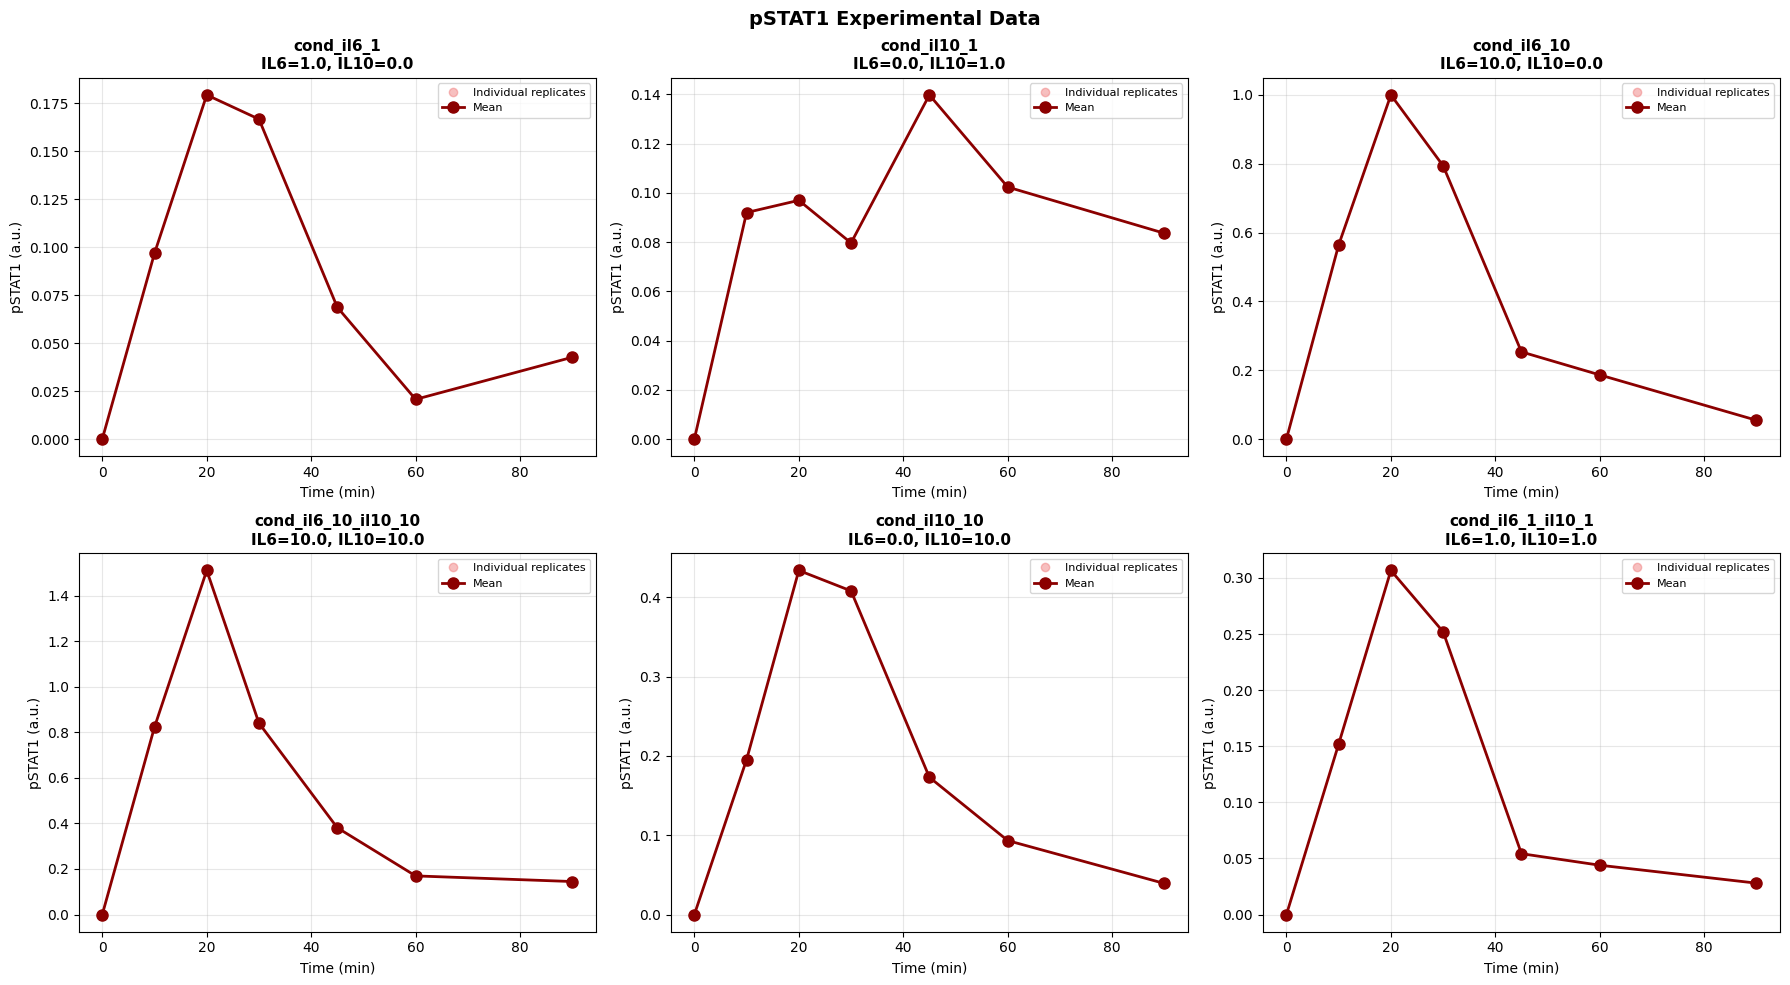


pSTAT1 Summary:
  Total measurements: 42
  Mean of means: 0.24
  Range: [0.00, 1.51]
  Average std deviation: nan


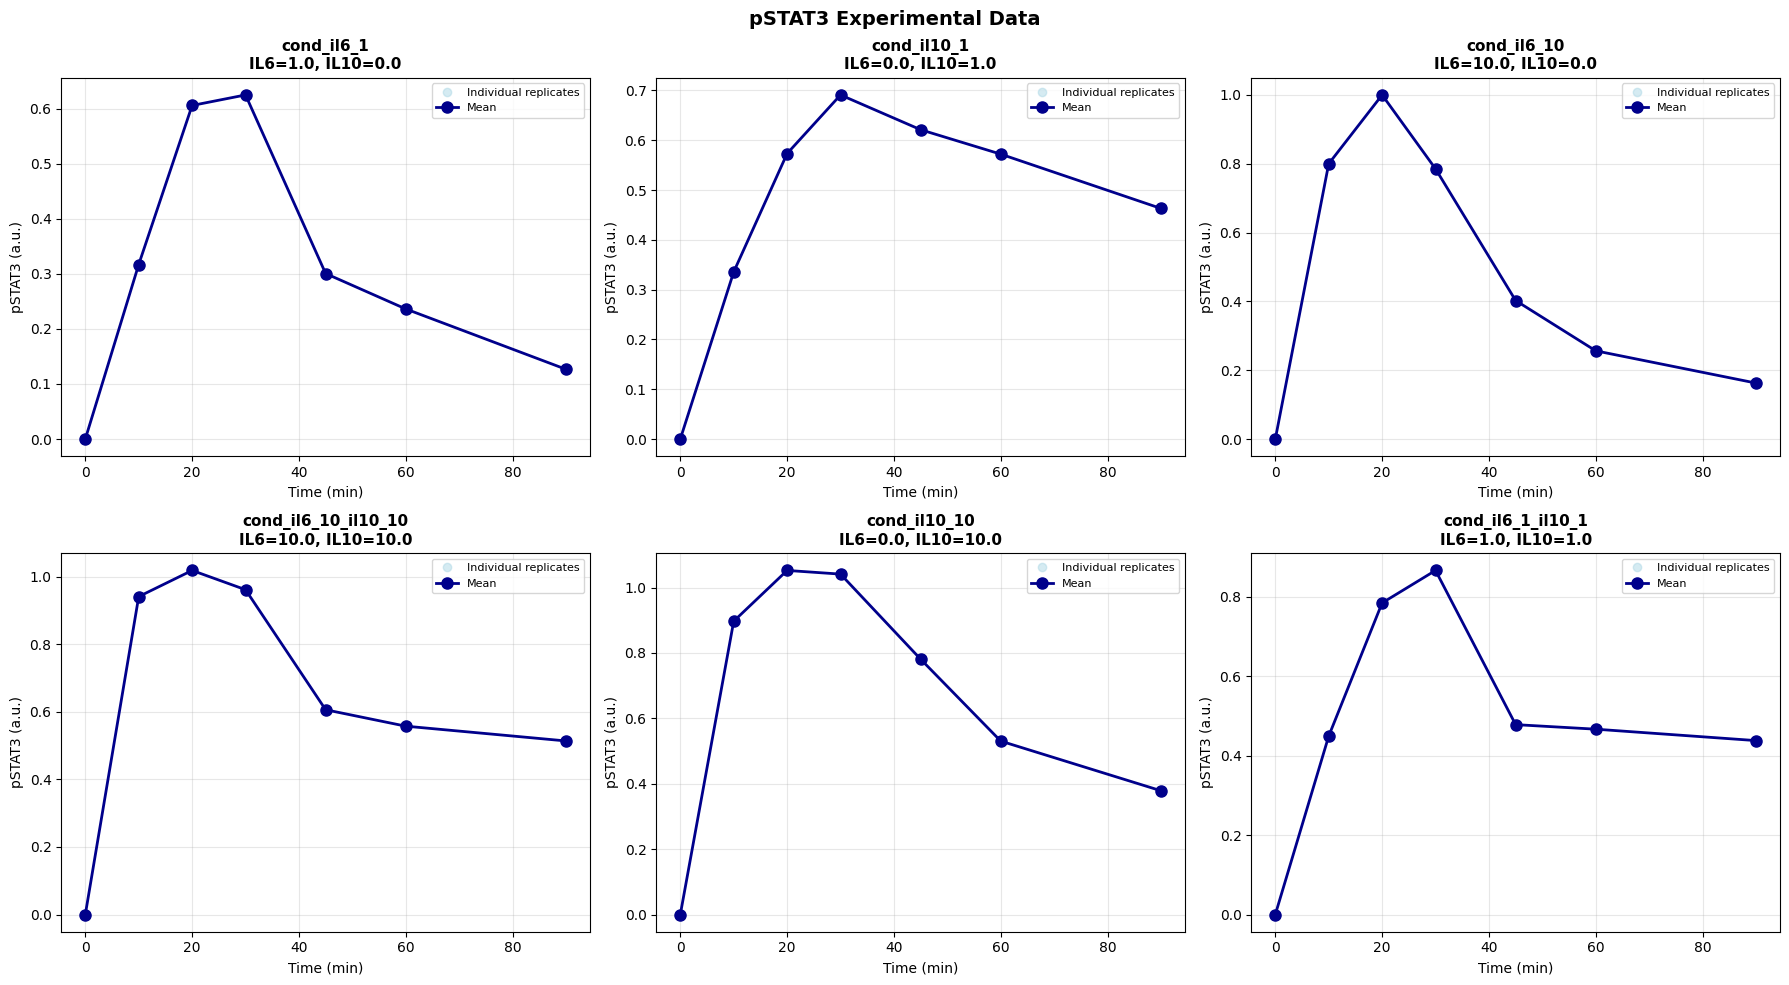


pSTAT3 Summary:
  Total measurements: 42
  Mean of means: 0.52
  Range: [0.00, 1.05]
  Average std deviation: nan


In [4]:
# Define observables and their plotting properties
observables = [
    {'id': 'obs_total_pS1', 'name': 'pSTAT1', 'light_color': 'lightcoral', 'dark_color': 'darkred'},
    {'id': 'obs_total_pS3', 'name': 'pSTAT3', 'light_color': 'lightblue', 'dark_color': 'darkblue'}
]

# Plot each observable
for obs in observables:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    observable_id = obs['id']
    observable_name = obs['name']
    
    for idx, cond_id in enumerate(conditions_df['conditionId']):
        ax = axes[idx]
        
        # Get condition info
        cond_row = conditions_df[conditions_df['conditionId'] == cond_id].iloc[0]
        
        # Get all individual measurements for this condition and observable
        cond_data = measurements_df[
            (measurements_df['simulationConditionId'] == cond_id) &
            (measurements_df['observableId'] == observable_id)
        ]
        
        # Get statistics for this condition and observable
        cond_stats = stats_df[
            (stats_df['simulationConditionId'] == cond_id) &
            (stats_df['observableId'] == observable_id)
        ]
        
        # Plot individual data points (replicates)
        ax.plot(cond_data['time'], cond_data['measurement'],
               'o', color=obs['light_color'], markersize=6, alpha=0.5, label='Individual replicates')
        
        # Plot mean
        ax.plot(cond_stats['time'], cond_stats['mean'],
               'o-', color=obs['dark_color'], markersize=8, linewidth=2, label='Mean')
        
        # Plot error bars (standard deviation)
        ax.errorbar(cond_stats['time'], cond_stats['mean'], yerr=cond_stats['std'],
                   fmt='none', ecolor=obs['dark_color'], capsize=5, linewidth=1.5, alpha=0.7)
        
        ax.set_title(f"{cond_id}\nIL6={cond_row['L1_0']}, IL10={cond_row['L2_0']}",
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Time (min)', fontsize=10)
        ax.set_ylabel(f'{observable_name} (a.u.)', fontsize=10)
        ax.legend(fontsize=8, loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'{observable_name} Experimental Data', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{observable_name} Summary:")
    obs_stats = stats_df[stats_df['observableId'] == observable_id]
    print(f"  Total measurements: {measurements_df[measurements_df['observableId'] == observable_id].shape[0]}")
    print(f"  Mean of means: {obs_stats['mean'].mean():.2f}")
    print(f"  Range: [{obs_stats['mean'].min():.2f}, {obs_stats['mean'].max():.2f}]")
    print(f"  Average std deviation: {obs_stats['std'].mean():.2f}")

## Combined Summary Statistics

In [5]:
# Create summary table by condition
print("\nSummary by Condition:")
print("=" * 80)

for cond_id in conditions_df['conditionId']:
    cond_row = conditions_df[conditions_df['conditionId'] == cond_id].iloc[0]
    
    # pSTAT1 stats
    pS1_cond_stats = stats_df[
        (stats_df['simulationConditionId'] == cond_id) &
        (stats_df['observableId'] == 'obs_total_pS1')
    ]
    
    # pSTAT3 stats
    pS3_cond_stats = stats_df[
        (stats_df['simulationConditionId'] == cond_id) &
        (stats_df['observableId'] == 'obs_total_pS3')
    ]
    
    print(f"\n{cond_id}: IL6={cond_row['L1_0']}, IL10={cond_row['L2_0']}")
    print(f"  pSTAT1: mean={pS1_cond_stats['mean'].mean():.1f}, std={pS1_cond_stats['std'].mean():.1f}, n={pS1_cond_stats['count'].iloc[0]}")
    print(f"  pSTAT3: mean={pS3_cond_stats['mean'].mean():.1f}, std={pS3_cond_stats['std'].mean():.1f}, n={pS3_cond_stats['count'].iloc[0]}")

print("\n" + "=" * 80)


Summary by Condition:

cond_il6_1: IL6=1.0, IL10=0.0
  pSTAT1: mean=0.1, std=nan, n=1
  pSTAT3: mean=0.3, std=nan, n=1

cond_il10_1: IL6=0.0, IL10=1.0
  pSTAT1: mean=0.1, std=nan, n=1
  pSTAT3: mean=0.5, std=nan, n=1

cond_il6_10: IL6=10.0, IL10=0.0
  pSTAT1: mean=0.4, std=nan, n=1
  pSTAT3: mean=0.5, std=nan, n=1

cond_il6_10_il10_10: IL6=10.0, IL10=10.0
  pSTAT1: mean=0.6, std=nan, n=1
  pSTAT3: mean=0.7, std=nan, n=1

cond_il10_10: IL6=0.0, IL10=10.0
  pSTAT1: mean=0.2, std=nan, n=1
  pSTAT3: mean=0.7, std=nan, n=1

cond_il6_1_il10_1: IL6=1.0, IL10=1.0
  pSTAT1: mean=0.1, std=nan, n=1
  pSTAT3: mean=0.5, std=nan, n=1

